# Programming with Python

[Programming with Python course](https://swcarpentry.github.io/python-novice-inflammation/) by Software Carpentry.

## Python Fundamentals

* Basic data types in Python include integers, strings, and floating-point numbers.
* Use `variable = value` to assign a value to a variable in order to record it in memory.
* Variables are created on demand whenever a value is assigned to them.
* Use `print(something)` to display the value of `something`.
* Built-in functions are always available to use.

## Analysing Patient Data

Load `NumPy` and use the function call `np.loadtxt()` to load `inflammation-01.csv`, which contains to arthritis patients' inflammation data where each row are data for each individual patient and the columns are their daily inflammation measurements.

In [1]:
import numpy as np
data = np.loadtxt(fname = '../data/swc/inflammation-01.csv', delimiter=',')
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


Data type using `type()`.

In [2]:
print(type(data))

<class 'numpy.ndarray'>


The `type()` function will only tell you that a variable is a `NumPy` array but not the type of values stored in the array. A NumPy array contains elements of the same type; use `dtype` to find out the type of data stored inside an array.

In [3]:
print(data.dtype)

float64


`data.shape` is an attribute of `data` that describes dimensions of `data` (60 patients with data for 40 days).

In [4]:
print(data.shape)

(60, 40)


Get first value (cell in first row and first column) using an index with square brackets.

In [5]:
print(data[0, 0])

0.0


An array slice from the first row to the fifth and first column to the fifth.

In [6]:
print(data[0:5, 0:5])

[[0. 0. 1. 3. 1.]
 [0. 1. 2. 1. 2.]
 [0. 1. 1. 3. 3.]
 [0. 0. 2. 0. 4.]
 [0. 1. 1. 3. 3.]]


We do not need to include the lower or upper bounds when slicing; Python will do this find the lowest and highest possible values when we do not specify the limits.

In [7]:
print(data[:5, 35:])

[[4. 2. 3. 0. 0.]
 [5. 1. 1. 0. 1.]
 [3. 2. 2. 1. 1.]
 [4. 2. 3. 2. 1.]
 [4. 2. 0. 1. 1.]]


Calculating the mean of entire array.

In [8]:
print(np.mean(data))

6.14875


Multiple assignment of descriptive statistics. Note to get more information about a function, add `?` to the end of the function, e.g. `np.std?`; this is the same as using `help(np.std)`.

In [9]:
maxval, minval, stdval = np.max(data), np.min(data), np.std(data)
print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.613833197118566


Calculate just for patient 1.

In [10]:
print(np.max(data[0, :]))

18.0


Calculate for all patients by using `axis = 1`. Axis 1 refers to the columns and we are calculating _across_ the columns.

In [11]:
print(np.max(data, axis = 1).shape)
print(np.max(data, axis = 1))

(60,)
[18. 18. 19. 17. 17. 18. 17. 20. 17. 18. 18. 18. 17. 16. 17. 18. 19. 19.
 17. 19. 19. 16. 17. 15. 17. 17. 18. 17. 20. 17. 16. 19. 15. 15. 19. 17.
 16. 17. 19. 16. 18. 19. 16. 19. 18. 16. 19. 15. 16. 18. 14. 20. 17. 15.
 17. 16. 17. 19. 18. 18.]


Calculate per day by using `axis = 0`. Axis 0 refers to the rows and we are calculating _across_ the rows.

In [12]:
print(np.max(data, axis = 0).shape)
print(np.max(data, axis = 0))

(40,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.
  4.  3.  2.  1.]


Slicing strings.

In [13]:
element = 'oxygen'
print(element[0:3])

oxy


Last index using negative value.

In [14]:
print(element[-2])

e


Stacking arrays using `hstack` and `vstack`, which are like `cbind` and `rbind` in R.

In [15]:
A = np.array(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)
print('A = ', "\n", A, "\n")

B = np.hstack([A, A])
print('B = ', "\n", B, "\n")

C = np.vstack([A, A])
print('C = ', "\n", C, "\n")

A =  
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

B =  
 [[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]] 

C =  
 [[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]] 



The `np.diff()` function takes an array and returns the difference between two successive values (as in R).

In [16]:
patient3_week1 = data[3, :7]
print(patient3_week1)
print(np.diff(patient3_week1))

[0. 0. 2. 0. 4. 2. 2.]
[ 0.  2. -2.  4. -2.  0.]


Calculating `np.diff` for all patients.

In [17]:
np.diff(data, axis = 1)

array([[ 0.,  1.,  2., ...,  1., -3.,  0.],
       [ 1.,  1., -1., ...,  0., -1.,  1.],
       [ 1.,  0.,  2., ...,  0., -1.,  0.],
       ...,
       [ 1.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0.,  0.,  1., ..., -2.,  2., -2.],
       [ 0.,  1., -1., ..., -2.,  0., -1.]])

Largest change in inflammation for each patient.

In [18]:
np.max(np.diff(data, axis = 1), axis = 1)

array([ 7., 12., 11., 10., 11., 13., 10.,  8., 10., 10.,  7.,  7., 13.,
        7., 10., 10.,  8., 10.,  9., 10., 13.,  7., 12.,  9., 12., 11.,
       10., 10.,  7., 10., 11., 10.,  8., 11., 12., 10.,  9., 10., 13.,
       10.,  7.,  7., 10., 13., 12.,  8.,  8., 10., 10.,  9.,  8., 13.,
       10.,  7., 10.,  8., 12., 10.,  7., 12.])

* Import a library into a program using `import libraryname`.
* Use the `numpy` library to work with arrays in Python.
* The expression `array.shape` gives the shape of an array.
* Use `array[x, y]` to select a single element from a 2D array.
* Array indices start at 0, not 1.
* Use `low:high` to specify a slice that includes the indices from low to high-1.
* Use `#` to add comments to programs.
* Use `numpy.mean(array)`, `numpy.max(array)`, and `numpy.min(array)` to calculate simple statistics.
* Use `numpy.mean(array, axis=0)` or `numpy.mean(array, axis=1)` to calculate statistics across the specified axis.

## Visualising Tabular Data

Python's `matplotlib` is the _de facto_ plotting library. Here we will use the `pyplot` module from `matplotlib` and use two of its functions to create and display a heat map. Each row of the heat map corresponds to a single patient and each column a day. Blue pixels represent low values and yellow pixels represent high values. The heat map shows that the general number of inflammation flare-ups for the patients rises and falls over a 40-day period.

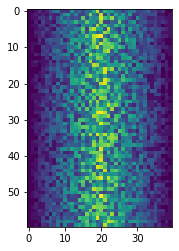

In [19]:
from matplotlib import pyplot as plt
image = plt.imshow(data)
plt.show()

Average inflammation per day across all patients.

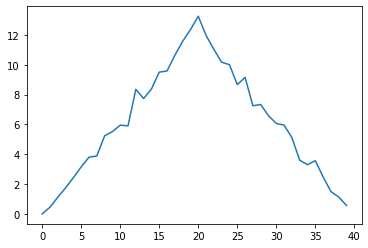

In [20]:
ave_inflammation = np.mean(data, axis = 0)
ave_plot = plt.plot(ave_inflammation)
plt.show()

Max inflammation per day across all patients.

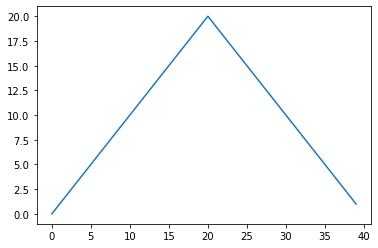

In [21]:
max_plot = plt.plot(np.max(data, axis = 0))
plt.show()

Minimum inflammation per day across all patients.

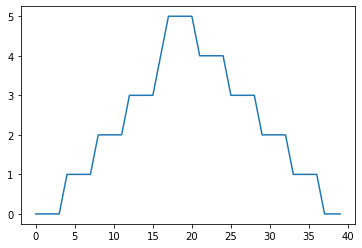

In [22]:
min_plot = plt.plot(np.min(data, axis = 0))
plt.show()

Group plot into a single figure using subplots. The function `plt.figure()` creates a space for the plots and the parameter `figsize` indicates the size of the space. Each subplot is added by using `add_subplot`, which takes three parameters (number of rows, number of columns, and plot index). Each subplot is stored in a different variable (`axes1`, `axes2`, and `axes3`).

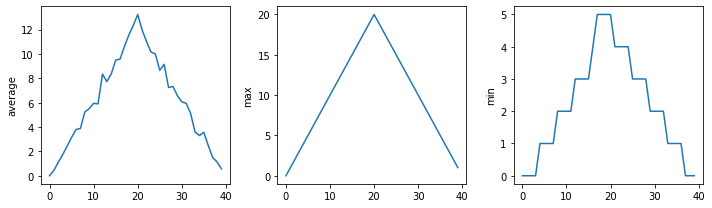

In [23]:
fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0))

fig.tight_layout()

# to save as PNG
# plt.savefig('inflammation.png')

plt.show()

## Storing Multiple Values in Lists

Lists are a way to store multiple values together and are a built-in data structure in Python. Lists are created by using square brackets.

In [24]:
odd_no = [1, 3, 5, 7]
print(odd_no)

[1, 3, 5, 7]


Indexing.

In [25]:
print(odd_no[0])
print(odd_no[-1])

1
7


Lists are mutable.

In [26]:
names = ['Curie', 'Darrr', 'Franklin']
names[1] = 'Darwin'
print(names)

['Curie', 'Darwin', 'Franklin']


Use the `list` function to create a copy of another list; assignment simply refers to the same list in memory.

In [27]:
x = [1, 2, 3]
x1 = x
x[0] = 0
print(x1)

x = [1, 2, 3]
x1 = list(x)
x[0] = 0
print(x1)

[0, 2, 3]
[1, 2, 3]


Nested lists.

In [28]:
x = [['pepper', 'zucchini', 'onion'],
     ['cabbage', 'lettuce', 'garlic'],
     ['apple', 'pear', 'banana']]

First list.

In [29]:
print(x[0])

['pepper', 'zucchini', 'onion']


List of list containing first list.

In [30]:
print([x[0]])

[['pepper', 'zucchini', 'onion']]


First item of first list.

In [31]:
print(x[0][0])

pepper


Python lists can contain different data types, i.e. heterogeneous lists.

In [32]:
ages = [1, 2, 'Unknown']
print(ages)

[1, 2, 'Unknown']


Append to a list.

In [33]:
odd_no = [1, 3, 5, 7]
odd_no.append(11)
print(odd_no)

[1, 3, 5, 7, 11]


Pop (remove last element by default) a list.

In [34]:
odd_no = [1, 3, 5, 7]
removed = odd_no.pop()
print(removed)
print(odd_no)

7
[1, 3, 5]


Pop can be used with an index for removing a specific item.

In [35]:
odd_no = [1, 3, 5, 7]
removed = odd_no.pop(1)
print(removed)
print(odd_no)

3
[1, 5, 7]


Reverse a list.

In [36]:
odd_no = [1, 3, 5, 7]
odd_no.reverse()
print(odd_no)

[7, 5, 3, 1]


List slicing is the same as slicing a `NumPy` array.

In [37]:
chr = [1, 2, 3, 'X', 'Y']
print(chr[3:])

['X', 'Y']


Slicing from the end.

In [38]:
string_for_slicing = 'Observation date: 02-Feb-2013'
print(string_for_slicing[-4:])

list_for_slicing = [['fluorine', 'F'],
                    ['chlorine', 'Cl'],
                    ['bromine', 'Br'],
                    ['iodine', 'I'],
                    ['astatine', 'At']]

print(list_for_slicing[-4:])

2013
[['chlorine', 'Cl'], ['bromine', 'Br'], ['iodine', 'I'], ['astatine', 'At']]


Non-continuous slices where the third argument is the step size.

In [39]:
x = list(range(0, 11))
print(x[::2])

[0, 2, 4, 6, 8, 10]


Concatenate using `+`.

In [40]:
x = list(range(0, 11))
print(x + [11, 12])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Repeat using `*`.

In [41]:
x = list(range(0, 11))
print(x * 2)
print(x + x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


* `[value1, value2, value3, ...]` creates a list.
* Lists can contain any Python object, including lists (i.e., list of lists).
* Lists are indexed and sliced with square brackets (e.g., list[0] and list[2:9]), in the same way as strings and arrays.
* Lists are mutable (i.e., their values can be changed in place).
* Strings are immutable (i.e., the characters in them cannot be changed).

## Repeating Actions with Loops

A for loop.

In [42]:
x = list(range(1, 11))
odd_no = x[::2]
for i in odd_no:
    print(i)

1
3
5
7
9


Use `len` to find the length of a list.

In [43]:
print(x)
print(len(x))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10


The `range` function can accept 1, 2 (), or 3 parameters.

In [44]:
print(list(range(11)))
print(list(range(1, 11)))
print(list(range(1, 11, 2)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 3, 5, 7, 9]


Using a for loop with a string.

In [45]:
word = 'oxygen'
for char in word:
    print(char)

o
x
y
g
e
n


The built-in function `enumerate` takes a sequence of numbers and generates a new sequence of the same length. The example below loops through a list and assigns the index to `i` and the value to `y`.

In [46]:
letters = 'abcdefghijkl'
for i, y in enumerate(letters):
    print('Index =', i, 'Value =', y)

Index = 0 Value = a
Index = 1 Value = b
Index = 2 Value = c
Index = 3 Value = d
Index = 4 Value = e
Index = 5 Value = f
Index = 6 Value = g
Index = 7 Value = h
Index = 8 Value = i
Index = 9 Value = j
Index = 10 Value = k
Index = 11 Value = l


## Analysing Data from Multiple Files

The `glob` library contains a function also called `glob` that finds files and directories that match a pattern, where patterns are provided as strings.

In [47]:
import glob
print(glob.glob("../data/swc/inflammation*.csv"))

['../data/swc/inflammation-01.csv', '../data/swc/inflammation-02.csv', '../data/swc/inflammation-03.csv', '../data/swc/inflammation-04.csv', '../data/swc/inflammation-05.csv', '../data/swc/inflammation-06.csv', '../data/swc/inflammation-07.csv', '../data/swc/inflammation-08.csv', '../data/swc/inflammation-09.csv', '../data/swc/inflammation-10.csv', '../data/swc/inflammation-11.csv', '../data/swc/inflammation-12.csv']


Iterate and plot files.

../data/swc/inflammation-01.csv


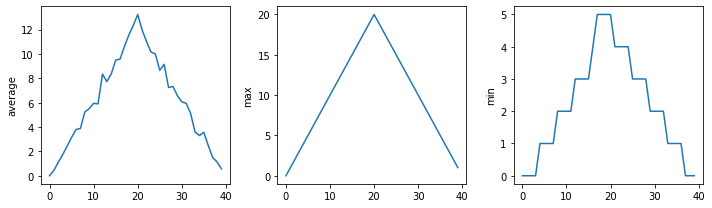

../data/swc/inflammation-02.csv


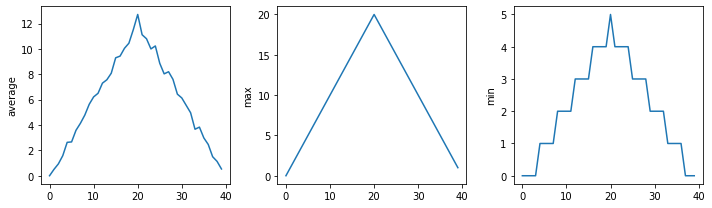

../data/swc/inflammation-03.csv


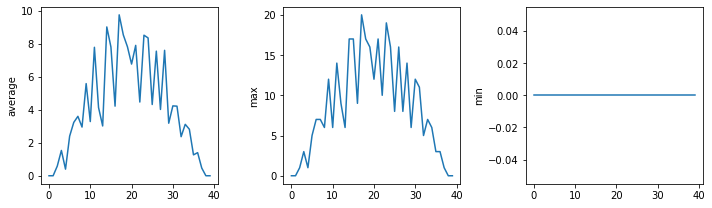

In [48]:
filenames = sorted(glob.glob("../data/swc/inflammation*.csv"))
filenames = filenames[0:3]
for filename in filenames:
    print(filename)

    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()

## Making Choices

`if`, `elif`, and `else` statement.

In [49]:
num = 37
if num > 100:
    print(num, 'is greater than 100')
elif num == 50:
    print(num, 'is equal to 50')
else:
    print(num, 'is less than 100')
print('done')

37 is less than 100
done


Use `and` and `or` for multiple tests.

In [50]:
num = 13
if (num >= 10) and (num <= 15):
    print(num, 'is between 10 and 15')
else:
    print(num, 'is not between 10 and 15')

num = 6
if (num < 5) or (num > 10):
    print(num, 'is either less than 5 or greater than 10')
else:
    print(num, 'is between 5 and 10')

13 is between 10 and 15
6 is between 5 and 10


`True` and `False` are special names in Python called `booleans` and represent truth values.

In [51]:
print(type(True))

<class 'bool'>


Truth tests.

In [52]:
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

word is true
non-empty list is true
one is true


Use `not` to check whether an evaluation is "not true".

In [53]:
if not '':
    print('empty string is not true')
if not 'word':
    print('word is not true')
if not not True:
    print('not not True is true')

empty string is not true
not not True is true


In place operators.

In [54]:
x = 1
x += 1
x *= 3
print(x)

6


* Use `if condition` to start a conditional statement, `elif condition` to provide additional tests, and `else` to provide a default.
* The bodies of the branches of conditional statements must be indented.
* Use `==` to test for equality.
* `X and Y` is only true if both `X` and `Y` are true.
* `X or Y` is true if either `X` or `Y`, or both, are true.
* Zero, the empty string, and the empty list are considered false; all other numbers, strings, and lists are considered true.
* `True` and `False` represent truth values.

## Creating Functions

Python functions open with the keyword `def` followed by the name of the function, parenthesised lists of parameter names, and ends with a colon. The body of the function, the statements that are executed when the function is called, is indented below the definition line. The body concludes with the `return` keyword followed with the return value.

In [55]:
def fahr_to_celsius(temp):
    return((temp - 32) * (5/9))

print(fahr_to_celsius(100))

37.77777777777778


Note that a `return` keyword is necessary unlike other languages that will automatically return the last result. A value of the class `NoneType` is returned.

In Python, functions are not required to include a `return` statement and can be used for the sole purpose of grouping together pieces of code that conceptually fit together.

In [56]:
def fahr_to_celsius_no_return(temp):
    (temp - 32) * (5/9)
    
no_return = fahr_to_celsius_no_return(100)
print(type(no_return))
print(no_return)

<class 'NoneType'>
None


To _compose_ a function means to apply one function to the result of another.

In [57]:
def celsius_to_kelvin(temp_c):
    return(temp_c + 273.15)

def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return(temp_k)

print(fahr_to_kelvin(212))

373.15


Variables created inside functions no longer exist once the function has finished executing, i.e. local variables, just like in other languages. Assign the result of a function to a variable to keep the result, i.e. global variable.

Documentation for a function can be included inside the function as the first string that is not assigned to a variable. If a triple quote is used, a string can be separated across multiple lines.

In [58]:
def celsius_to_kelvin(temp_c):
    """
    Converts Celsius to Kelvin.
    
    Examples
    --------
    >>> celsius_to_kelvin(42)
    """
    return(temp_c + 273.15)

help(celsius_to_kelvin)

Help on function celsius_to_kelvin in module __main__:

celsius_to_kelvin(temp_c)
    Converts Celsius to Kelvin.
    
    Examples
    --------
    >>> celsius_to_kelvin(42)



Set default values for parameters by assigning a value. If the parameter name is not specified, arguments are read positionally from left to right.

In [59]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)
print('only setting c')
display(c = 77)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3
only setting c
a: 1 b: 2 c: 77


* Define a function using `def function_name(parameter)`.
* The body of a function must be indented.
* Call a function using `function_name(value)`.
* Numbers are stored as integers or floating-point numbers.
* Variables defined within a function can only be seen and used within the body of the function.
* Variables created outside of any function are called global variables.
* Within a function, we can access global variables.
* Variables created within a function override global variables if their names match.
* Use `help(thing)` to view help for something.
* Put docstrings in functions to provide help for that function.
* Specify default values for parameters when defining a function using `name=value` in the parameter list.
* Parameters can be passed by matching based on name, by position, or by omitting them (in which case the default value is used).
* Put code whose parameters change frequently in a function, then call it with different parameter values to customise its behaviour.

## Errors and Exceptions

Errors in Python have a very specific form called a **trackback**, which contains the sequence of function calls that led to an error. Long tracebacks simply indicates that many functions were called before the error was encountered. Most of the time, the actual place where the error occurred is at the bottom-most level, so you can skip down the traceback to the bottom. See this list of [built-in exceptions](https://docs.python.org/3/library/exceptions.html) for more information.

Syntax errors occur, for example, when you forget a colon at the end of a line, accidentally add too many spaces when indenting, or forget a parenthesis. This is similar to forgetting punctuation in English and it becomes difficult to interpret the text. Python will inform us that there is a syntax error with a `SyntaxError` or `IndentationError` message and a caret (`^`) indicating where the syntax error occurred. For indentation, note that Python does not allow you to mix tabs and spaces; either tabs or spaces are used and their use needs to be consistent.

Another common type of error is called a `NameError` and occurs when you try to use a variable that does not exist (not defined yet or a result of a typo) or forgot to put quotes around a string. This results in a `name variable_name is not defined`.

An `IndexError` occurs when we try to access a list index that does not exist.

A `FileNotFoundError` occurs when we try to read a file that does not exist. An `UnsupportedOperationError` occurs when we try to write to a file that was opened "read-only". More generally, problems with input and output manifest as `IOError` or `OSError` errors, depending on the version of Python used.

* Tracebacks can look intimidating, but they give us a lot of useful information about what went wrong in our program, including where the error occurred and what type of error it was.
* An error having to do with the "grammar" or syntax of the program is called a `SyntaxError`. If the issue has to do with how the code is indented, then it will be called an `IndentationError`.
* A `NameError` will occur when trying to use a variable that does not exist. Possible causes are that a variable definition is missing, a variable reference differs from its definition in spelling or capitalization, or the code contains a string that is missing quotes around it.
* Containers like lists and strings will generate errors if you try to access items in them that do not exist. This type of error is called an `IndexError`.
* Trying to read a file that does not exist will give you an `FileNotFoundError`. Trying to read a file that is open for writing, or writing to a file that is open for reading, will give you an `IOError`.

## Defensive Programming

In order to indicate whether a program is getting the right answer and _still_ getting the right answer after making changes, we need to:

* Write programs that check their own operation.
* Write and run tests for widely-used functions.
* Make sure we know what "correct" actually means.

### Assertions

An assertion is an expression that is supposed to be true at a particular point in a program. Programmers typically put assertions in their code to check for errors; if the assertion fails (i.e., if the expression evaluates as false), the program halts and produces an error message. We can add assertions to our code so that it checks itself as it runs and this is known as defensive programming: the practice of writing programs that check their own operation to catch errors as early as possible.

An assertion is simply a _statement that something must be true at a certain point in a program_. When Python comes across an assertion, it evaluates the assertion's condition and if it is true, nothing happens, but if it is false, the program immediately halts with `AssertionError` and an error message is outputted if provided.

Broadly speaking, assertions fall into three categories:

* A precondition is something that must be true at the start of a function in order for it to work correctly.
* A postcondition is something that the function guarantees is true when it finishes.
* An invariant is something that is always true at a particular point inside a piece of code.

For example, suppose we are representing rectangles using a tuple of four coordinates `(x0, y0, x1, y1)` representing the lower left and upper right corners of the rectangle. In order to perform some calculations, we need to normalise the rectangle such that the lower left corner is at the origin and the longest side if 1.0 units long. The following function performs the normalisation as well as checks whether the input is correctly formatted and that the result make sense.

In [60]:
def normalise_rectangle(rect):
    """Normalises a rectangle so that it is at the origin and 1.0 units long on its longest axis.
    Input should be of the format (x0, y0, x1, y1).
    (x0, y0) and (x1, y1) define the lower left and upper right corners
    of the rectangle, respectively."""
    assert len(rect) == 4, 'Rectangles must contain 4 coordinates'
    x0, y0, x1, y1 = rect
    # x1 should be on the right of x0
    assert x0 < x1, 'Invalid X coordinates'
    # y1 should be on the top of y0
    assert y0 < y1, 'Invalid Y coordinates'

    # change in x is the length of horizontal edge
    dx = x1 - x0
    # change in y is the length of the vertical edge
    dy = y1 - y0
    # scaled contains the ratio between the horizontal and vertical edge
    # which we can use for normalisation
    if dx > dy:
        scaled = float(dy) / dx
        upper_x, upper_y = 1.0, scaled
    else:
        scaled = float(dx) / dy
        upper_x, upper_y = scaled, 1.0

    # note that upper_x and upper_y are defined in the if-else block but are available outside
    assert 0 < upper_x <= 1.0, 'Calculated upper X coordinate invalid'
    assert 0 < upper_y <= 1.0, 'Calculated upper Y coordinate invalid'

    return (0, 0, upper_x, upper_y)

Call `normalise_rectange`.

In [61]:
print(normalise_rectangle((1, 1, 5, 2)))

(0, 0, 1.0, 0.25)


Assertions aren't just about catching errors but they also help people understand programs. Each assertion gives the person reading the program a change to check that their understanding matches what the code is doing.

Most good programmers follow two rules when adding assertions to their code:

1. Fail early, fail often

The greater the distance between when and where an error occurred and when it is noticed, the harder the error will be to debug, so good code catches mistakes as early as possible.

2. Turn bugs into assertions or tests.

Whenever you fix a bug, write an assertion that catches the mistake should you make it again. If you made a mistake in a piece of code, the odds are good that you have made other mistakes nearby, or will make the same mistake (or a related one) the next time you change it. Writing assertions to check that you have not regressed (re-introduced an old problem) can save a lot of time in the long run.

### Test-Driven Development

An assertion checks that something is true as a particular point in the program. The next step is to check the overall behaviour of a piece of code, i.e., to make sure that it produces the right output when it has been given a particular input. For example, suppose we need to find where two or more time series overlap and output the largest range that they all include. The input is the range of each time series represented as a pair of numbers (start and end).

Most novice programmers would solve this problem in the following manner:

1. Write a function `range_overlap`.
2. Call it interactively on two or three different inputs.
3. If it produces the wrong answer, fix the function and re-run that test.

The approach above works but there is a better way:

1. Write a short function for each test.
2. Write a `range_overlap` function that should pass those tests.
3. If `range_overlap` produces any incorrect answers, fix it and re-run the test functions.

Writing unit tests _before_ writing the code they test is called test-driven development (TDD). Advocates of this approach believe it produces better code faster because:

1. If people write tests after writing the thing to be tested, they are subject to confirmation bias, i.e., they subconsciously write tests to show that their code is correct, rather than to find errors.
2. Writing tests helps programmers figure out what the function is actually supposed to do.

* Program defensively, i.e., assume that errors are going to arise, and write code to detect them when they do.
* Put assertions in programs to check their state as they run, and to help readers understand how those programs are supposed to work.
* Use preconditions to check that the inputs to a function are safe to use.
* Use postconditions to check that the output from a function is safe to use.
* Write tests before writing code in order to help determine exactly what that code is supposed to do.